<a href="https://colab.research.google.com/github/Joovvhan/Master-Thesis/blob/master/log/(PN)N-F_Xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import necessary modules

import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wf
import time
import glob
import datetime

from tqdm import trange

# Import Keras modules

from keras.preprocessing import image
from keras.layers import Input, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.models import Sequential
from keras import backend as K
from keras.models import load_model


In [0]:
# Mount google drive

# from google.colab import drive
# drive.mount('/content/gdrive')
# os.listdir('gdrive/My Drive/Colab')

In [0]:
# Set data directories

dataPath = '''D:\\0_Joowhan's Paper\\Synthesized\\Total\\Impulse'''
modelPath = '''D:\\0_Joowhan's Paper\\Synthesized\\Total\\Model'''


# Changed variable names to normal and fault
# Changed variable names from folder to path
# Need to consider multiple folders
# Need to add files to be tested

# folderNormal = ['P1N1', 'P2N1', 'P3N1', 'P4N1', 'P5N1']
folderNormal = list()

for x in range(1, 6):
    for y in range(1, 6):
        if (x <= 2 and y <= 2):
            folderNormal.append('P{}N{}'.format(x, y))

folderFault = list()

# folderFault = ['P1N5', 'P2N5', 'P3N5', 'P4N5', 'P5N5']

for x in range(1, 6):
    for y in range(1, 6):
        if (x == 5 or y == 5):
            folderFault.append('P{}N{}'.format(x, y))


pathNormal = list()
pathFault = list()

for i in range(len(folderNormal)):
    pathNormal.append(dataPath + '/' + folderNormal[i])
    
for i in range(len(folderFault)):
    pathFault.append(dataPath + '/' + folderFault[i])

In [0]:
# Specgram settings

nsc = 1470
nov = nsc/2
nff = nsc 
imgSize = 224

# pretrainedModel = 'VGG19'
pretrainedModel = 'Xception'
# pretrainedModel = 'ResNet50'

# pretrainedModel = 'DenseNet169'
# pretrainedModel = 'InceptionV3'


lastActivation = 'softmax'
sizeBatch = 4
numEpochs = 12
verb = 1


# Learning parameters

trainingRatio = 0.8

totalDataNum = 1000
repeat = 5

In [9]:
startNum = 0

pickNum = int(np.ceil(totalDataNum / len(pathNormal)))

for i in range(startNum, len(pathNormal)):

    npyTestPath = glob.glob(pathNormal[i] + '/' + '*Image_With_Label.npy')
    data = np.load(npyTestPath[0])
    
    pickIdx = np.random.choice(1000, pickNum, replace=False)
    pickIdx.sort()
    
#     imgs = np.moveaxis(np.dstack(data[:, 0]), 2, 0)
#     label = data[:, 1:5]

    imgs = np.moveaxis(np.dstack(data[pickIdx, 0]), 2, 0)
    label = data[pickIdx, 1:5]
    
    if i == startNum:
        labelListNormal = label
        imgsNormal = imgs
    else:
        labelListNormal = np.vstack([labelListNormal, label])
        imgsNormal = np.vstack([imgsNormal, imgs])

    print('Normal Image Shape From {}: {}:'.format(pathNormal[i], totalDataNum))    
    print('Selected {}/{}:'.format(pickNum * (i + 1), len(data)))    
    
    
print('Normal Image Shape: {}'.format(imgsNormal.shape))


Normal Image Shape From D:\0_Joowhan's Paper\Synthesized\Total\Impulse/P1N1: 1000:
Selected 250/1000:
Normal Image Shape From D:\0_Joowhan's Paper\Synthesized\Total\Impulse/P1N2: 1000:
Selected 500/1000:
Normal Image Shape From D:\0_Joowhan's Paper\Synthesized\Total\Impulse/P2N1: 1000:
Selected 750/1000:
Normal Image Shape From D:\0_Joowhan's Paper\Synthesized\Total\Impulse/P2N2: 1000:
Selected 1000/1000:
Normal Image Shape: (1000, 224, 224)


In [10]:
startNum = 0

pickNum = int(np.ceil(totalDataNum / len(pathFault)))

for i in range(startNum, len(pathFault)):

    npyTestPath = glob.glob(pathFault[i] + '/' + '*Image_With_Label.npy')
    data = np.load(npyTestPath[0])
    
    pickIdx = np.random.choice(1000, pickNum, replace=False)
    pickIdx.sort()
    
#     imgs = np.moveaxis(np.dstack(data[:, 0]), 2, 0)
#     label = data[:, 1:5]
    
    imgs = np.moveaxis(np.dstack(data[pickIdx, 0]), 2, 0)
    label = data[pickIdx, 1:5]
    
    if i == startNum:
        labelListFault = label
        imgsFault = imgs
    else:
        labelListFault = np.vstack([labelListFault, label])
        imgsFault = np.vstack([imgsFault, imgs])

    print('Fault Image Shape From {}: {}:'.format(pathFault[i], totalDataNum))    
    print('Selected {}/{}:'.format(pickNum * (i + 1), len(data)))     
    
print('Fault Image Shape: {}'.format(imgsFault.shape))

Fault Image Shape From D:\0_Joowhan's Paper\Synthesized\Total\Impulse/P1N5: 1000:
Selected 112/1000:
Fault Image Shape From D:\0_Joowhan's Paper\Synthesized\Total\Impulse/P2N5: 1000:
Selected 224/1000:
Fault Image Shape From D:\0_Joowhan's Paper\Synthesized\Total\Impulse/P3N5: 1000:
Selected 336/1000:
Fault Image Shape From D:\0_Joowhan's Paper\Synthesized\Total\Impulse/P4N5: 1000:
Selected 448/1000:
Fault Image Shape From D:\0_Joowhan's Paper\Synthesized\Total\Impulse/P5N1: 1000:
Selected 560/1000:
Fault Image Shape From D:\0_Joowhan's Paper\Synthesized\Total\Impulse/P5N2: 1000:
Selected 672/1000:
Fault Image Shape From D:\0_Joowhan's Paper\Synthesized\Total\Impulse/P5N3: 1000:
Selected 784/1000:
Fault Image Shape From D:\0_Joowhan's Paper\Synthesized\Total\Impulse/P5N4: 1000:
Selected 896/1000:
Fault Image Shape From D:\0_Joowhan's Paper\Synthesized\Total\Impulse/P5N5: 1000:
Selected 1008/1000:
Fault Image Shape: (1008, 224, 224)


In [11]:
# Change name from imgsF1 or imgsF5 to imgsNormal and imgsFault

dataNumNormal = len(imgsNormal)
dataNumFault = len(imgsFault)
dataNumNormalTrain = int(dataNumNormal * trainingRatio)
dataNumFaultTrain = int(dataNumFault * trainingRatio)
dataNumNormalTest = dataNumNormal - dataNumNormalTrain
dataNumFaultTest = dataNumFault - dataNumFaultTrain

print('Normal Train:Test = {:d}:{:d}'.format(dataNumNormalTrain, dataNumNormalTest))
print('Fault  Train:Test = {:d}:{:d}\n'.format(dataNumFaultTrain, dataNumFaultTest))

trainIdxNormal = np.random.choice(dataNumNormal - 1, dataNumNormalTrain, replace=False)
testIdxNormal = list(set(range(0, dataNumNormal)) - set(trainIdxNormal))

trainImgsNormal = imgsNormal[trainIdxNormal, :, :]
testImgsNormal = imgsNormal[testIdxNormal, :, :]

print('Normal Training Image Shape {}'.format(trainImgsNormal.shape))
print('Normal Test Image Shape {}\n'.format(testImgsNormal.shape))

trainIdxFault  = np.random.choice(dataNumFault - 1, dataNumFaultTrain, replace=False)
testIdxFault = list(set(range(0, dataNumFault)) - set(trainIdxFault))

trainImgsFault = imgsFault[trainIdxFault, :, :]
testImgsFault = imgsFault[testIdxFault, :, :]

print('Fault Training Image Shape {}'.format(trainImgsFault.shape))
print('Fault Test Image Shape {}\n'.format(testImgsFault.shape))

trainImgs = np.vstack([trainImgsNormal, trainImgsFault])
testImgs = np.vstack([testImgsNormal, testImgsFault])

print('Training Image Shape {}'.format(trainImgs.shape))
print('Test Image Shape {}'.format(testImgs.shape))

Normal Train:Test = 800:200
Fault  Train:Test = 806:202

Normal Training Image Shape (800, 224, 224)
Normal Test Image Shape (200, 224, 224)

Fault Training Image Shape (806, 224, 224)
Fault Test Image Shape (202, 224, 224)

Training Image Shape (1606, 224, 224)
Test Image Shape (402, 224, 224)


In [12]:
trainMean = np.mean(trainImgs)
trainStd = np.std(trainImgs)

print('Mean of Training Image: {}'.format(trainMean))
print('Standard Deviation of Training Image: {}'.format(trainStd))

Mean of Training Image: -79.21006028451447
Standard Deviation of Training Image: 8.117297388637008


In [0]:
# Should Change Norm to Normalized

trainImgsNorm = (trainImgs - trainMean) / trainStd
testImgsNorm = (testImgs - trainMean) / trainStd

trainImgsNorm = trainImgsNorm.reshape(list(trainImgsNorm.shape) + [1])
testImgsNorm = testImgsNorm.reshape(list(testImgsNorm.shape) + [1])

In [14]:
X_train = np.stack([trainImgsNorm[:, :, :, 0], trainImgsNorm[:, :, :, 0], trainImgsNorm[:, :, :, 0]], axis = -1)
X_test = np.stack([testImgsNorm[:, :, :, 0], testImgsNorm[:, :, :, 0], testImgsNorm[:, :, :, 0]], axis = -1)

print('X_train Shape: {}'.format(X_train.shape))
print('X_test  Shape: {}'.format(X_test.shape))

X_train Shape: (1606, 224, 224, 3)
X_test  Shape: (402, 224, 224, 3)


In [15]:
trainLabelNormal = np.stack((np.ones(dataNumNormalTrain), np.zeros(dataNumNormalTrain)), axis = -1)
testLabelNormal = np.stack((np.ones(dataNumNormalTest), np.zeros(dataNumNormalTest)), axis = -1)

trainLabelFault = np.stack((np.zeros(dataNumFaultTrain), np.ones(dataNumFaultTrain)), axis = -1)
testLabelFault = np.stack((np.zeros(dataNumFaultTest), np.ones(dataNumFaultTest)), axis = -1)

Y_train = np.vstack((trainLabelNormal, trainLabelFault))
Y_test = np.vstack((testLabelNormal, testLabelFault))

print('Y_train Normal:Fault = {:d}:{:d}'.format(len(trainLabelNormal), len(trainLabelFault)))
print('Y_test  Normal:Fault = {:d}:{:d}'.format(len(testLabelNormal), len(testLabelFault)))

Y_train Normal:Fault = 800:806
Y_test  Normal:Fault = 200:202


In [16]:
from keras.applications import VGG19
from keras.applications import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.xception import Xception
from keras.applications.densenet import DenseNet169
from keras.applications.densenet import DenseNet201
from keras.applications.inception_v3 import InceptionV3

# pretrainedModel = 'ResNet50'
# lastActivation = 'softmax'
# lossFunction = 'binary_crossentropy'
# sizeBatch = 2
# numEpochs = 2
# verb = 1

for rp in range(repeat):

    # Refresh all background variables
    K.clear_session()

    input_tensor = Input(shape=(imgSize, imgSize, 3))

    # Building sequential model with name 'model'
    model = Sequential()

    # Model selection

    if (pretrainedModel == 'VGG16'):

        modelWoTop = VGG16(input_tensor=input_tensor, weights='imagenet', include_top=False)
        model.add(modelWoTop)
        model.add(Flatten())
        model.add(Dense(4096, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(4096, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(2, activation=lastActivation))

    elif (pretrainedModel == 'VGG19'):

        modelWoTop = VGG19(input_tensor=input_tensor, weights='imagenet', include_top=False)
        model.add(modelWoTop)
        model.add(Flatten())
        model.add(Dense(4096, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(4096, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(2, activation=lastActivation))

    elif pretrainedModel == 'ResNet50':

        modelWoTop = ResNet50(input_tensor=input_tensor, weights='imagenet', include_top=False)
        model.add(modelWoTop)
        model.add(Flatten())
        model.add(Dense(2, activation=lastActivation))

    elif (pretrainedModel == 'InceptionV3'):
        modelWoTop = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)
        model.add(modelWoTop)
        model.add(GlobalAveragePooling2D())
        model.add(Dense(2, activation=lastActivation))

    elif (pretrainedModel == 'Xception'):
        modelWoTop = Xception(input_tensor=input_tensor, weights='imagenet', include_top=False)
        model.add(modelWoTop)
        model.add(GlobalAveragePooling2D())
        model.add(Dense(2, activation=lastActivation))

    elif (pretrainedModel == 'DenseNet169'):

        modelWoTop = DenseNet169(input_tensor=input_tensor, weights='imagenet', include_top=False)
        model.add(modelWoTop)
        model.add(GlobalAveragePooling2D())
        model.add(Dense(2, activation=lastActivation))

    elif (pretrainedModel == 'DenseNet201'):
        modelWoTop = DenseNet201(input_tensor=input_tensor, weights='imagenet', include_top=False)
        model.add(modelWoTop)
        model.add(GlobalAveragePooling2D())
        model.add(Dense(2, activation=lastActivation))

    else:
        print('Invalid Pretrained Model Selection')



    # Model compiling

    print('Compiling Pretrained {} Model'.format(model.layers[0].name))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    print('Training Pretrained {} Model'.format(model.layers[0].name))
    print('Batch Size: {}\t Epochs: {}\t\n'.format(sizeBatch, numEpochs))

    model.fit(X_train, Y_train,
              batch_size=sizeBatch, epochs=numEpochs, verbose=1,
              validation_data=(X_test, Y_test))

Compiling Pretrained xception Model
Training Pretrained xception Model
Batch Size: 4	 Epochs: 12	

Train on 1606 samples, validate on 402 samples
Epoch 1/12
1606/1606 [==============================] - 84s 53ms/step - loss: 0.4752 - acc: 0.8064 - val_loss: 1.1549 - val_acc: 0.6716
Epoch 2/12
1606/1606 [==============================] - 72s 45ms/step - loss: 0.4254 - acc: 0.8281 - val_loss: 2.8741 - val_acc: 0.6741
Epoch 3/12
1606/1606 [==============================] - 72s 45ms/step - loss: 0.3140 - acc: 0.8917 - val_loss: 0.1001 - val_acc: 0.9776
Epoch 4/12
1606/1606 [==============================] - 72s 45ms/step - loss: 0.2669 - acc: 0.9091 - val_loss: 2.5744 - val_acc: 0.4577
Epoch 5/12
1606/1606 [==============================] - 72s 45ms/step - loss: 0.1257 - acc: 0.9589 - val_loss: 0.0693 - val_acc: 0.9876
Epoch 6/12
1606/1606 [==============================] - 72s 45ms/step - loss: 0.1132 - acc: 0.9664 - val_loss: 1.3434 - val_acc: 0.8085
Epoch 7/12
1606/1606 [================

In [21]:
# Refresh all background variables
K.clear_session()

input_tensor = Input(shape=(imgSize, imgSize, 3))

# Building sequential model with name 'model'
model = Sequential()

# Model selection

if (pretrainedModel == 'VGG16'):

    modelWoTop = VGG16(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'VGG19'):

    modelWoTop = VGG19(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation=lastActivation))

elif pretrainedModel == 'ResNet50':

    modelWoTop = ResNet50(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(Flatten())
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'InceptionV3'):
    modelWoTop = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'Xception'):
    modelWoTop = Xception(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'DenseNet169'):

    modelWoTop = DenseNet169(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'DenseNet201'):
    modelWoTop = DenseNet201(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))

else:
    print('Invalid Pretrained Model Selection')



# Model compiling

print('Compiling Pretrained {} Model'.format(model.layers[0].name))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

numEpochs = 20

print('Training Pretrained {} Model'.format(model.layers[0].name))
print('Batch Size: {}\t Epochs: {}\t\n'.format(sizeBatch, numEpochs))

model.fit(X_train, Y_train,
          batch_size=sizeBatch, epochs=numEpochs, verbose=1,
          validation_data=(X_test, Y_test))

Compiling Pretrained xception Model
Training Pretrained xception Model
Batch Size: 4	 Epochs: 20	

Train on 1606 samples, validate on 402 samples
Epoch 1/20
1606/1606 [==============================] - 83s 52ms/step - loss: 0.4618 - acc: 0.8269 - val_loss: 8.0550 - val_acc: 0.4975
Epoch 2/20
1606/1606 [==============================] - 72s 45ms/step - loss: 0.3017 - acc: 0.9103 - val_loss: 0.0658 - val_acc: 0.9851
Epoch 3/20
1606/1606 [==============================] - 73s 45ms/step - loss: 0.2193 - acc: 0.9265 - val_loss: 0.0581 - val_acc: 0.9801
Epoch 4/20
1606/1606 [==============================] - 73s 45ms/step - loss: 0.1180 - acc: 0.9626 - val_loss: 0.0736 - val_acc: 0.9876
Epoch 5/20
1606/1606 [==============================] - 73s 45ms/step - loss: 0.0944 - acc: 0.9682 - val_loss: 0.0591 - val_acc: 0.9851
Epoch 6/20
1606/1606 [==============================] - 73s 45ms/step - loss: 0.0801 - acc: 0.9770 - val_loss: 0.1081 - val_acc: 0.9851
Epoch 7/20
1606/1606 [================

In [22]:
model.fit(X_train, Y_train,
          batch_size=sizeBatch, epochs=4, verbose=1,
          validation_data=(X_test, Y_test))

Train on 1606 samples, validate on 402 samples
Epoch 1/4
1606/1606 [==============================] - 72s 45ms/step - loss: 0.0169 - acc: 0.9963 - val_loss: 0.0387 - val_acc: 0.9900
Epoch 2/4
1606/1606 [==============================] - 73s 45ms/step - loss: 0.0431 - acc: 0.9851 - val_loss: 0.0681 - val_acc: 0.9876
Epoch 3/4
1606/1606 [==============================] - 72s 45ms/step - loss: 0.0286 - acc: 0.9913 - val_loss: 0.0349 - val_acc: 0.9900
Epoch 4/4
1606/1606 [==============================] - 74s 46ms/step - loss: 0.0443 - acc: 0.9869 - val_loss: 2.2373 - val_acc: 0.8358


In [23]:
model.fit(X_train, Y_train,
          batch_size=sizeBatch, epochs=4, verbose=1,
          validation_data=(X_test, Y_test))

Train on 1606 samples, validate on 402 samples
Epoch 1/4
1606/1606 [==============================] - 73s 46ms/step - loss: 0.0341 - acc: 0.9900 - val_loss: 0.0286 - val_acc: 0.9925
Epoch 2/4
1606/1606 [==============================] - 74s 46ms/step - loss: 0.0265 - acc: 0.9944 - val_loss: 0.0517 - val_acc: 0.9900
Epoch 3/4
1606/1606 [==============================] - 74s 46ms/step - loss: 0.0076 - acc: 0.9988 - val_loss: 0.0564 - val_acc: 0.9900
Epoch 4/4
1606/1606 [==============================] - 73s 46ms/step - loss: 0.0122 - acc: 0.9975 - val_loss: 0.0696 - val_acc: 0.9876


In [0]:
# K.clear_session()

# input_tensor = Input(shape=(imgSize, imgSize, 3))

# # Building sequential model with name 'model'
# model = Sequential()

# modelWoTop = ResNet50(input_tensor=input_tensor, weights='imagenet', include_top=False)
# model.add(modelWoTop)
# model.add(Flatten())
# model.add(Dense(2, activation=lastActivation))

# # Model compiling

# print('Compiling Pretrained {} Model'.format(model.layers[0].name))

# model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

# numEpochs = 1

# print('Training Pretrained {} Model'.format(model.layers[0].name))
# print('Batch Size: {}\t Epochs: {}\t\n'.format(sizeBatch, numEpochs))

# model.fit(X_train, Y_train,
#           batch_size=sizeBatch, epochs=numEpochs, verbose=1,
#           validation_data=(X_test, Y_test))

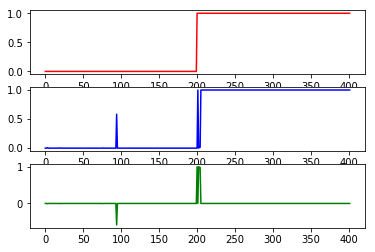

In [24]:
Y_pred = model.predict(X_test)

plt.subplot(3, 1, 1)
plt.plot(Y_test[:, 1], 'r')

plt.subplot(3, 1, 2)
plt.plot(Y_pred[:, 1], 'b')

plt.subplot(3, 1, 3)
plt.plot(Y_test[:, 1] - Y_pred[:, 1], 'g')

plt.show()

In [25]:
now = datetime.datetime.now()

# modelSaved = '{}-{}_{}_{}.h5'.format(folderNormal, folderFault, pretrainedModel, now.strftime('%m-%d-%H:%M:%S'))

modelSaved = '(PN){}-{}_{}_{}.h5'.format('N', 'F', pretrainedModel, now.strftime('%m-%d-%H-%M-%S'))
meanSaved = 'mean_{}.npy'.format(now.strftime('%m-%d-%H-%M-%S'))
stdSaved = 'std_{}.npy'.format(now.strftime('%m-%d-%H-%M-%S'))

inputStr = input('''Save Model as '{}'? (y/n)\n'''.format(modelSaved))

if (inputStr == 'y' or inputStr == 'Y'):  
    model.save(modelPath + '/{}'.format(modelSaved))
    np.save(modelPath + '/{}'.format(meanSaved), trainMean)
    np.save(modelPath + '/{}'.format(stdSaved), trainStd)

Save Model as '(PN)N-F_Xception_11-19-18-39-51.h5'? (y/n)
y
